In [1]:
import sys
sys.path.append("./keras/classification/")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
from keras.preprocessing.image import ImageDataGenerator
from Models_verison2 import model_version2
from log_visualization_tool import visual_train
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:

def cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/", 
                    epoch=300, 
                    save_model_name = 'cls_model_0821.h5',
                    model_summary="True",
                    weights = None):
    
    model = model_version2()
    if weights is not None:
        model.load_weights(weights)
        
    test_data_path = data_path + "val"
    train_data_path = data_path + "train"
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    training_datagen = ImageDataGenerator(rescale=1. / 255,
                                          rotation_range=40, # 旋转范围
                                          width_shift_range=0.2, # 宽平移
                                          height_shift_range=0.2,# 高平移
                                          shear_range=0.2, # 剪切
                                          zoom_range=0.2, # 缩放
                                          horizontal_flip=True,
                                          fill_mode='nearest')
    
    training_generator = training_datagen.flow_from_directory(train_data_path,
                                                              target_size=(120, 160),
                                                              color_mode="grayscale",
                                                              class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
    

    # 使用 ReduceLROnPlateau 回调函数
    adam = Adam(lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #======== 模型训练 =========
    history = model.fit(
        training_generator,
        epochs = epoch,
        validation_data = validation_generator,
        callbacks=[reduce_lr, early_stopping]
    )

    model.save(save_model_name) # model 保存

    return history

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 160, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 120, 160, 3)          30        ['input_1[0][0]']             
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 120, 160, 3)          30        ['conv2d[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 conv2d_1 (Conv2D)           (None, 120, 160, 16)         64        ['depthwise_conv2d[0][0]']

Epoch 1/300
39/39 [==============================] - 6s 100ms/step - loss: 0.7374 - accuracy: 0.4185 - val_loss: 0.6900 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/300
39/39 [==============================] - 3s 88ms/step - loss: 0.6455 - accuracy: 0.4685 - val_loss: 0.7133 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/300
39/39 [==============================] - 3s 88ms/step - loss: 0.5972 - accuracy: 0.5119 - val_loss: 0.7214 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/300
39/39 [==============================] - 3s 88ms/step - loss: 0.5719 - accuracy: 0.5397 - val_loss: 0.7070 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/300
39/39 [==============================] - 3s 88ms/step - loss: 0.5528 - accuracy: 0.5536 - val_loss: 0.6774 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/300
39/39 [==============================] - 4s 91ms/step - loss: 0.5351 - accuracy: 0.5815 - val_loss: 0.6542 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/300
39/39 [==============================] - 4s 91ms/step - l

/home/zhangyouan/anaconda3/envs/stc/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


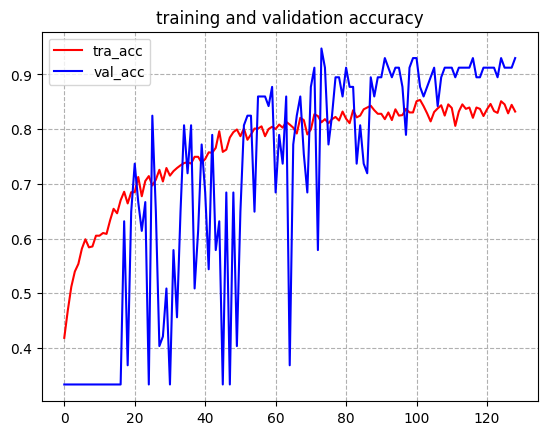

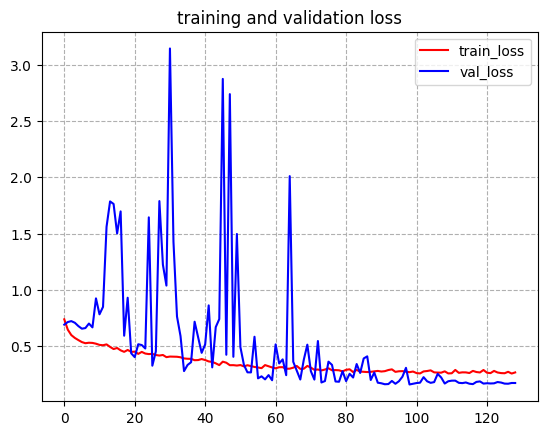

In [3]:
if __name__ == "__main__":
    history = cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/", 
                              epoch=300, 
                              save_model_name = './../../output/keras/cls/model_0827_retrain.h5' )
    visual_train(history)